# 0. Install Dependencies and Bring in Data

In [2]:
pip install pandas

     --------------------------------------- 10.4/10.4 MB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# 1. Preprocess

In [4]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.3.0
aiohttp                      3.8.3
aiosignal                    1.2.0
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-timeout                4.0.2
attrs                        21.4.0
Babel                        2.9.1
backcall                     0.2.0
bcrypt                       4.0.1
beautifulsoup4               4.11.1
bleach                       4.1.0
brotlipy                     0.7.0
cachetools                   5.2.0
certifi                      2022.9.24
cffi                         1.15.1
charset-normalizer           2.0.4
click                        8.1.3
colorama                     0.4.5
contourpy                    1.0.6
cryptography                 38.0.1
cycler                       0.11.0
debugpy                      1.5.1
d

In [5]:
from tensorflow.keras.layers import TextVectorization

In [6]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [7]:
MAX_FEATURES = 200000 # number of words in the vocab

In [8]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [9]:
vectorizer.adapt(X.values)

In [10]:
vectorized_text = vectorizer(X.values)

In [11]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [12]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# 2. Create Sequential Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [14]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [15]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [18]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
6981/6981 [==============================] - 4580s 656ms/step - loss: 0.0452 - val_loss: 0.0424
Epoch 2/5
6981/6981 [==============================] - 4568s 654ms/step - loss: 0.0397 - val_loss: 0.0356
Epoch 3/5
6981/6981 [==============================] - 4654s 667ms/step - loss: 0.0355 - val_loss: 0.0306
Epoch 4/5
6981/6981 [==============================] - 9716s 1s/step - loss: 0.0319 - val_loss: 0.0283
Epoch 5/5
6981/6981 [==============================] - 5879s 842ms/step - loss: 0.0287 - val_loss: 0.0239


In [19]:
# !pip install matplotlib
from matplotlib import pyplot as plt       

<Figure size 800x500 with 0 Axes>

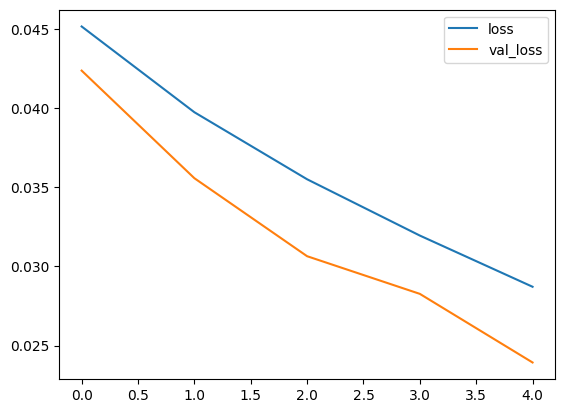

In [20]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [21]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [22]:
res = model.predict(input_text)

ValueError: in user code:

    File "A:\Softwares\Anaconda\envs\comment\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "A:\Softwares\Anaconda\envs\comment\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "A:\Softwares\Anaconda\envs\comment\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "A:\Softwares\Anaconda\envs\comment\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "A:\Softwares\Anaconda\envs\comment\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "A:\Softwares\Anaconda\envs\comment\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "bidirectional" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 32)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None


In [27]:
(res > 0.5).astype(int)

NameError: name 'res' is not defined

In [28]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [23]:
(model.predict(batch_X) > 0.5).astype(int)

NameError: name 'batch_X' is not defined

In [ ]:
res.shape

# 4. Evaluate Model

In [24]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [25]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [26]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 188ms/step


1/1 [==============================] - 0s 166ms/step


In [29]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9034322500228882, Recall:0.85329669713974, Accuracy:0.49548646807670593


# 5. Test and Gradio

In [34]:
!pip install gradio jinja2

     --------------------------------------- 11.6/11.6 MB 17.7 MB/s eta 0:00:00
     ------------------------------------- 198.9/198.9 kB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 15.5 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 8.8 MB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 12.0 MB/s eta 0:00:00
     ------------------------------------- 319.7/319.7 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 56.6/56.6 kB ? eta 0:00:00
     ---------------------------------------- 212.9/212.9 kB ? eta 0:00:00
     -----

In [30]:
import tensorflow as tf
import gradio as gr

In [31]:
model.save('toxicity.h5')

In [32]:
model = tf.keras.models.load_model('toxicity.h5')

In [33]:
input_str = vectorizer('hey i freaken hate you!')

In [34]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 1s/step


In [40]:
res

array([[0.90389997, 0.03361451, 0.53120655, 0.01843068, 0.5079726 ,
        0.0543991 ]], dtype=float32)

In [35]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [36]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

A:\Softwares\Anaconda\envs\comment\lib\site-packages\gradio\inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
A:\Softwares\Anaconda\envs\comment\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
A:\Softwares\Anaconda\envs\comment\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
A:\Softwares\Anaconda\envs\comment\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [37]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://ba5b9f60de356142.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x1b450620610>,
 'http://127.0.0.1:7860/',
 'https://ba5b9f60de356142.gradio.app')

1/1 [==============================] - 0s 107ms/step
